## 数据集 Alzheimer Disease and Healthy Aging Data In US

### 此数据集包含一个csv文件：  
·Alzheimer Disease and Healthy Aging Data In US.csv 包含 29 列和 214462 行美国的阿尔茨海默病和健康老龄化数据

In [1]:
# 导入必要的包
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import math
from scipy import stats
from collections import Counter
from math import isnan
%matplotlib inline

### 1.数据集展示

In [2]:
#载入数据
f_data="dataset/Alzheimer Disease and Healthy Aging Data In US/Alzheimer Disease and Healthy Aging Data In US.csv"
data = pd.read_csv(f_data, index_col=False, low_memory=False)
data.head()# 默认展示前五行数据

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [3]:
data.dtypes # 每列数据的数据类型

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit          object
High_Confidence_Limit         object
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

In [4]:
# 数据集的含义
# 列名------------------------含义
# YearStart                   数据收集开始的年份（标称）
# YearEnd                     数据收集结束的年份（标称）
# LocationAbbr                数据收集位置的缩写（标称）
# LocationDesc                数据收集位置的全名（标称）
# Datasource                  数据来源（标称）
# Class                       数据的类（标称）
# Topic                       数据的主题（标称）
# Question                    与数据相关的问题（标称）
# Data_Value_Unit             数据值测量的单位（标称）
# DataValueTypeID             数据值类型ID（标称）
# Data_Value_Type             数据值的类型（例如平均值、百分比）（标称）
# Data_Value                  实际数据值（数值）
# Data_Value_Alt              一个替代数据值（数值）
# Low_Confidence_Limit        数据值置信区间的下限（数值）
# High_Confidence_Limit       数据值置信区间的上限（数值）
# Sample_Size                 用于收集数据的样本的大小
# StratificationCategory1     用于分层的第一个类别（例如年龄组）（标称）
# Stratification1             使用的特定分层（例如18-24岁）（标称）
# StratificationCategory2     用于分层的第二类（标称）
# Stratification2             用于第二类的具体分层（标称）
# Geolocation                 收集数据的位置的经纬度（数值）
# ClassID                     数据类的ID（标称）
# TopicID                     数据主题的ID（标称）
# QuestionID                  与数据相关的问题的ID（标称）
# LocationID                  收集数据的位置的ID（标称）
# StratificationCategoryID1   用于分层的第一个类别的ID（标称）
# StratificationID1           用于第一类的特定分层的ID（标称）
# StratificationCategoryID2   用于分层的第二个类别的ID（标称）
# StratificationID2           用于第二类的特定分成的ID（标称）   

In [5]:
#将混合数据转换为数值数据
data["Low_Confidence_Limit"] = pd.to_numeric(data["Low_Confidence_Limit"],errors='coerce')
data["High_Confidence_Limit"] = pd.to_numeric(data["High_Confidence_Limit"],errors='coerce')
data.dtypes #每列数据的数据类型

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit         float64
High_Confidence_Limit        float64
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

In [6]:
data.shape # 数据集的大小

(214462, 29)

In [7]:
data.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          70009
High_Confidence_Limit         70009
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   

注意到 Sample_Size 属性全部缺失，可能无法获取等原因。因对后续数据分析和处理无用，现将其删除。

In [8]:
data.drop(labels = ['Sample_Size'],axis=1,level=None,inplace=True)
data.shape

(214462, 28)

### 2.数据分析

#### 2.1数据摘要和可视化

**由数据集展示可知该数据集中将大量不同的问题对应的数据集中在一起，不同问题的数据之间应当分别分析。**  
**接下来首先展示Class，Topic，Question等属性的频数和直方图，对整个数据集有一个大致的了解。**  
**然后选取某一个问题对该问题对应的数据进行分析和处理。**  

In [9]:
#(1)Class,  ClassID
data["Class"].value_counts()

Overall Health                         71694
Screenings and Vaccines                46867
Nutrition/Physical Activity/Obesity    24851
Cognitive Decline                      19180
Caregiving                             18671
Mental Health                          16600
Smoking and Alcohol Use                16599
Name: Class, dtype: int64

In [10]:
#(2)Topic, TopicID
data["Topic"].value_counts()

Obesity                                                                                                   8300
Influenza vaccine within past year                                                                        8300
Physically unhealthy days (mean number of days)                                                           8300
Frequent mental distress                                                                                  8300
Current smoking                                                                                           8300
Lifetime diagnosis of depression                                                                          8300
No leisure-time physical activity within past month                                                       8300
Self-rated health (fair to poor health)                                                                   8299
Self-rated health (good to excellent health)                                                              8299
B

In [11]:
#(3)Question,  QuestionID
data["Question"].value_counts()

Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more                                                                               8300
Percentage of older adults who reported influenza vaccine within the past year                                                                                               8300
Physically unhealthy days (mean number of days in past month)                                                                                                                8300
Percentage of older adults who are experiencing frequent mental distress                                                                                                     8300
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days                                               8300
Percentage of older adults with a lifetime diagnosis of depression                                            

In [12]:
#选取某一问题生成待处理的示例数据集
Question = 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more'
source_data = data.copy(deep=True)
data = data[data['Question'] == Question]
data.shape

(8300, 28)

**此时 Class, Topic, Question, ClassID, TopicID, QuestionID等属性不再需要保留，展示后去除以便数据的后续处理**  

In [13]:
#保留属性如下：
['YearStart', 'YearEnd', 
 'LocationAbbr', 'LocationDesc', 'Geolocation', 'LocationID',
 'Datasource',
 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 
 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 
 'StratificationCategory1', 'Stratification1', 'StratificationCategoryID1', 'StratificationID1',
 'StratificationCategory2', 'Stratification2', 'StratificationCategoryID2', 'StratificationID2']

data.drop(labels = ['Class', 'Topic', 'Question', 'ClassID', 'TopicID', 'QuestionID'],axis=1,level=None,inplace=True)
data.shape

(8300, 22)

In [14]:
#检查保留属性信息
data.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit         float64
High_Confidence_Limit        float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
StratificationCategoryID2     object
StratificationID2             object
dtype: object

In [15]:
#检查缺失值情况
data.isnull().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Data_Value_Unit                 0
DataValueTypeID                 0
Data_Value_Type                 0
Data_Value                   2411
Data_Value_Alt               2411
Low_Confidence_Limit         2411
High_Confidence_Limit        2411
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1044
Stratification2              1044
Geolocation                   720
LocationID                      0
StratificationCategoryID1       0
StratificationID1               0
StratificationCategoryID2       0
StratificationID2               0
dtype: int64

##### 2.1.1数据摘要  
**以“Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more”为例进行数据分析和处理**  
  ·标称属性，给出每个可能取值的频数  
  ·数值属性，给出5数概括及缺失值的个数  

##### 标称属性  
由数据集展示可知该数据集标称属性共有15个，将其分为9组：     
(1)LocationAbbr, LocationDesc,   
(2)Datasource,   
(3)Data_Value_Unit,   
(4)DataValueTypeID, Data_Value_Type,   
(5)StratificationCategory1, StratificationCategoryID1,   
(6)Stratification1, StratificationID1,   
(7)StratificationCategory2, StratificationCategoryID2,   
(8)Stratification2, StratificationID2，  
(9)Geolocation.    
考虑到一些属性具有相关性，下面分组给出标称属性取值的频数 

In [16]:
#(1)LocationAbbr，LocationDesc
data["LocationDesc"].value_counts()

Alaska                             144
South                              144
Arizona                            144
Nevada                             144
New York                           144
New Mexico                         144
New Hampshire                      144
North Carolina                     144
North Dakota                       144
Oklahoma                           144
Ohio                               144
Oregon                             144
Pennsylvania                       144
Rhode Island                       144
Minnesota                          144
South Carolina                     144
Tennessee                          144
South Dakota                       144
Texas                              144
United States, DC & Territories    144
Utah                               144
Vermont                            144
West                               144
Washington                         144
Virginia                           144
West Virginia            

In [17]:
#(2)Datasource
data["Datasource"].value_counts()

BRFSS    8300
Name: Datasource, dtype: int64

In [18]:
#(3)Data_Value_Unit
data["Data_Value_Unit"].value_counts()

%    8300
Name: Data_Value_Unit, dtype: int64

In [19]:
#(4)DataValueTypeID,  Data_Value_Type
data["Data_Value_Type"].value_counts()

Percentage    8300
Name: Data_Value_Type, dtype: int64

In [20]:
#(5)StratificationCategory1,  StratificationCategoryID1
data["StratificationCategory1"].value_counts()

Age Group    8300
Name: StratificationCategory1, dtype: int64

In [21]:
#(6)Stratification1,  StratificationID1
data["Stratification1"].value_counts()

Overall              2771
50-64 years          2768
65 years or older    2761
Name: Stratification1, dtype: int64

In [22]:
#(7)StratificationCategory2,  StratificationCategoryID2
data["StratificationCategory2"].value_counts()

Race/Ethnicity    5168
Gender            2088
Name: StratificationCategory2, dtype: int64

In [23]:
#(8)Stratification2,  StratificationID2
data["Stratification2"].value_counts()

Hispanic                    1044
Male                        1044
White, non-Hispanic         1044
Female                      1044
Asian/Pacific Islander      1035
Black, non-Hispanic         1035
Native Am/Alaskan Native    1010
Name: Stratification2, dtype: int64

In [24]:
#(9)Geolocation
data["Geolocation"].value_counts()

POINT (-147.722059 64.84507996)     144
POINT (-94.7942005 46.35564874)     144
POINT (-111.7638113 34.86597028)    144
POINT (-117.0718406 39.49324039)    144
POINT (-75.54397043 42.82700103)    144
POINT (-106.240581 34.52088095)     144
POINT (-71.50036092 43.65595011)    144
POINT (-79.15925046 35.46622098)    144
POINT (-100.118421 47.47531978)     144
POINT (-97.52107021 35.47203136)    144
POINT (-82.40426006 40.06021014)    144
POINT (-120.1550313 44.56744942)    144
POINT (-77.86070029 40.79373015)    144
POINT (-71.52247031 41.70828019)    144
POINT (-81.04537121 33.9988213)     144
POINT (-85.77449091 35.68094058)    144
POINT (-100.3735306 44.35313005)    144
POINT (-99.42677021 31.82724041)    144
POINT (-111.5871306 39.36070017)    144
POINT (-72.51764079 43.62538124)    144
POINT (-120.4700108 47.52227863)    144
POINT (-78.45789046 37.54268067)    144
POINT (-80.71264013 38.6655102)     144
POINT (-89.53803082 32.7455101)     144
POINT (-92.56630005 38.63579078)    144


##### 数值属性  
数值属性共有7个，分别为：  
YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit ,High_Confidence_Limit,LocationID   
下面给出每个属性的5数概括及缺失值的个数  

In [25]:
# 用 describe 函数对数值数据的 5 数进行概括
digital_data = ['YearStart','YearEnd','Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit','LocationID']
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.4f'%x) # 小数点后面保留4位小数
data[digital_data].describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,8300.0000,8300.0000,5889.0000,5889.0000,5889.0000,5889.0000,8300.0000
mean,2017.4917,2017.4917,33.7121,33.7121,29.1389,38.6961,653.5188
std,1.7079,1.7079,7.4038,7.4038,6.5922,9.6166,2280.1404
min,2015.0000,2015.0000,3.7000,3.7000,2.1000,6.5000,1.0000
25%,2016.0000,2016.0000,29.2000,29.2000,25.5000,32.3000,18.0000
50%,2017.0000,2017.0000,33.3000,33.3000,29.4000,37.2000,32.0000
75%,2019.0000,2019.0000,38.0000,38.0000,33.4000,43.6000,48.0000
max,2020.0000,2020.0000,72.4000,72.4000,54.6000,90.7000,9004.0000


In [26]:
#给出数据缺失值情况
data[digital_data].isnull().sum()

YearStart                   0
YearEnd                     0
Data_Value               2411
Data_Value_Alt           2411
Low_Confidence_Limit     2411
High_Confidence_Limit    2411
LocationID                  0
dtype: int64

##### 2.1.1数据可视化  
  ·使用直方图、盒图等检查数据分布及离群点  

**标称属性**  

In [27]:
#定义标称属性可视化函数
def nom_attri_vis(attri):
    data[attri].value_counts().plot(kind="bar",figsize=(12,3))

分别对上述9组标称属性绘制直方图  
(1)LocationAbbr, LocationDesc,   
(2)Datasource,   
(3)Data_Value_Unit,   
(4)DataValueTypeID, Data_Value_Type,   
(5)StratificationCategory1, StratificationCategoryID1,   
(6)Stratification1, StratificationID1,   
(7)StratificationCategory2, StratificationCategoryID2,   
(8)Stratification2, StratificationID2，  
(9)Geolocation.

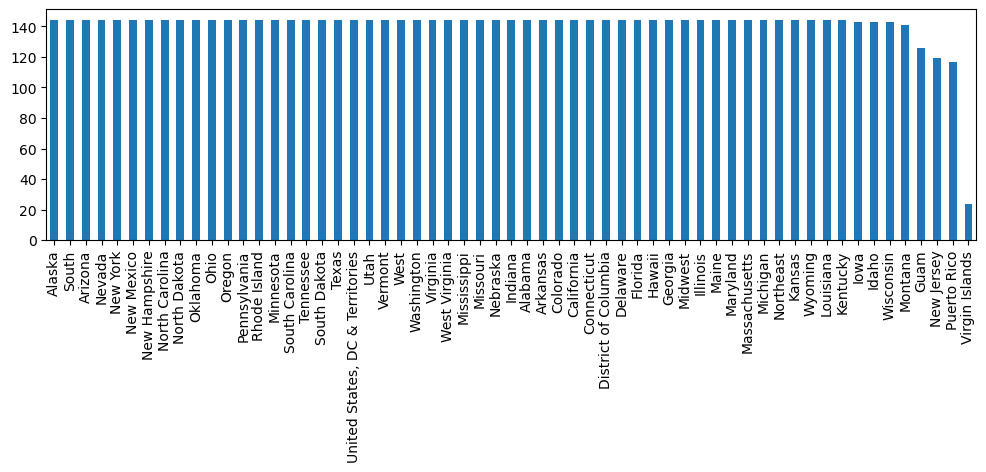

In [28]:
#(1)LocationAbbr，LocationDesc
attri = 'LocationDesc'
nom_attri_vis(attri)

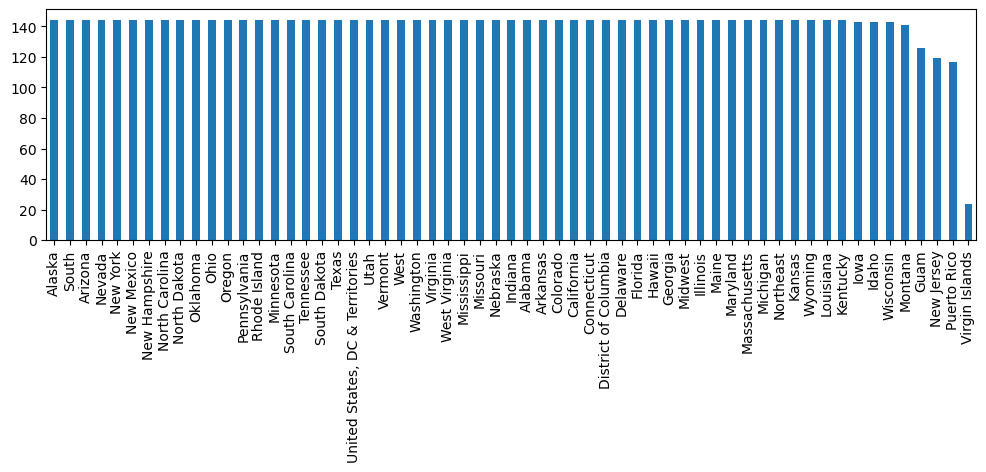

In [29]:
#(2)Datasource
attri = 'LocationDesc'
nom_attri_vis(attri)

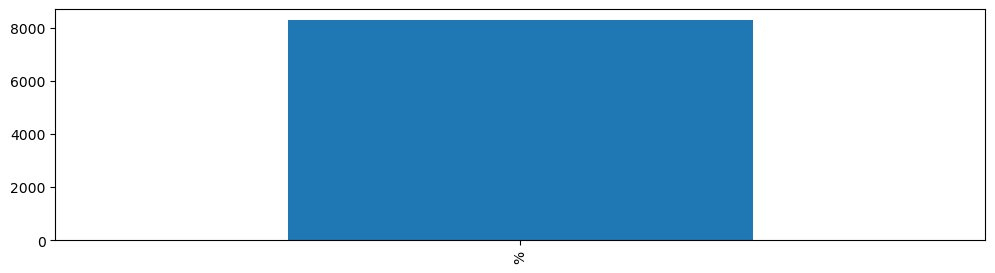

In [30]:
#(3)Data_Value_Unit
attri = 'Data_Value_Unit'
nom_attri_vis(attri)

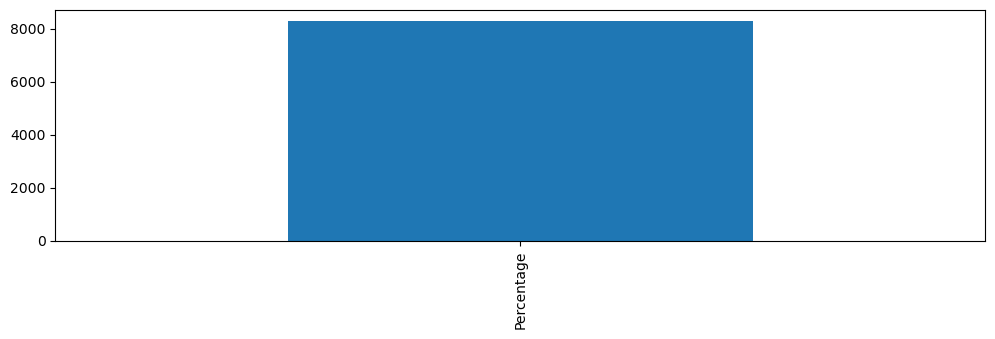

In [31]:
#(4)DataValueTypeID,  Data_Value_Type
attri = 'Data_Value_Type'
nom_attri_vis(attri)

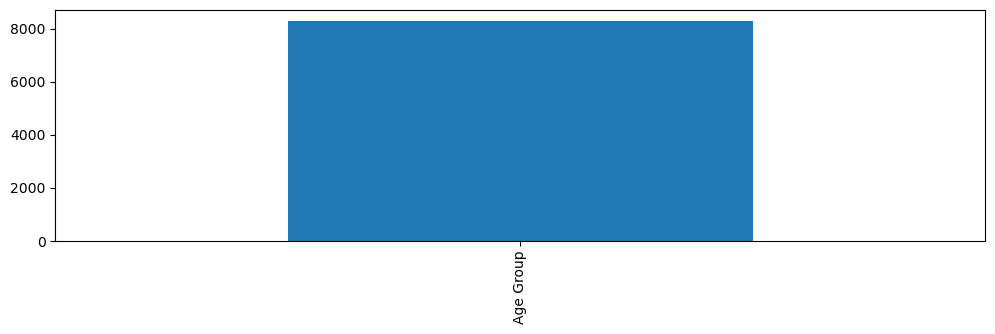

In [32]:
#(5)StratificationCategory1,  StratificationCategoryID1
attri = 'StratificationCategory1'
nom_attri_vis(attri)

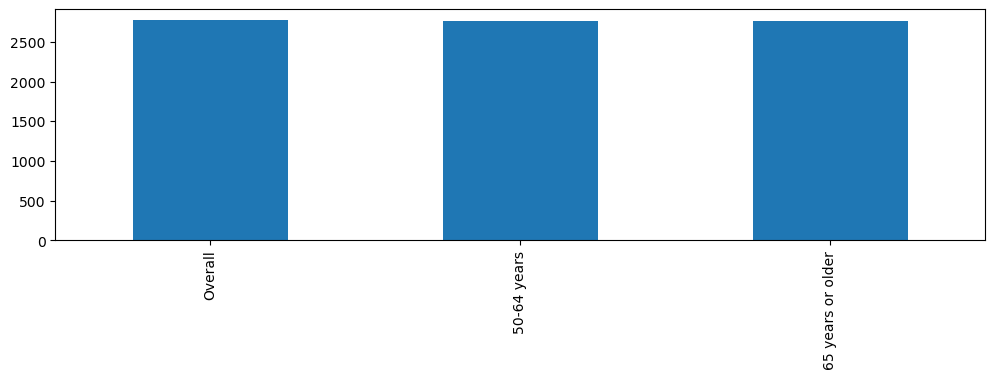

In [33]:
#(6)Stratification1,  StratificationID1
attri = 'Stratification1'
nom_attri_vis(attri)

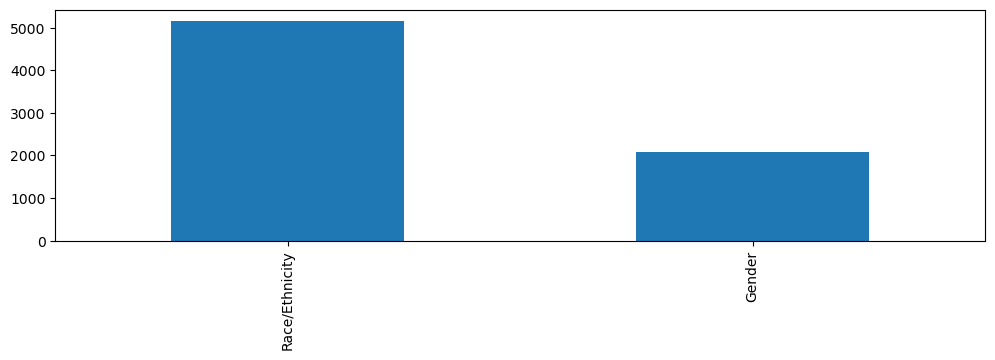

In [34]:
#(7)StratificationCategory2,  StratificationCategoryID2
attri = 'StratificationCategory2'
nom_attri_vis(attri)

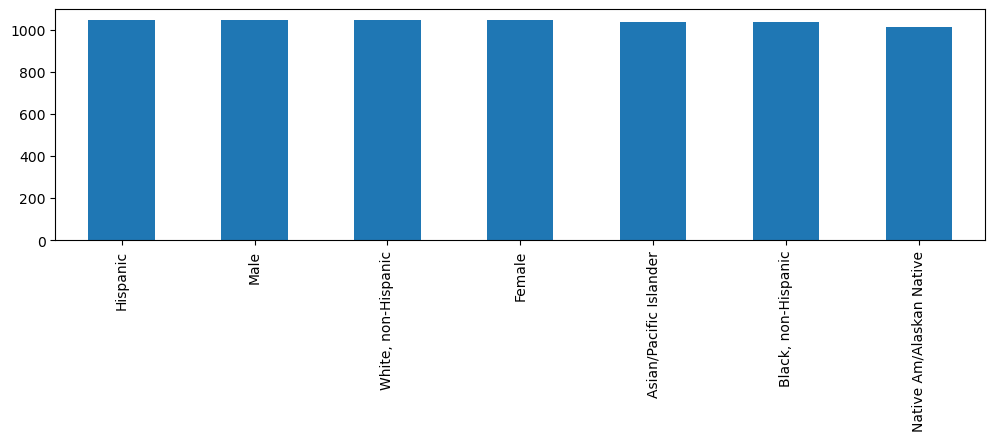

In [35]:
#(8)Stratification2,  StratificationID2
attri = 'Stratification2'
nom_attri_vis(attri)

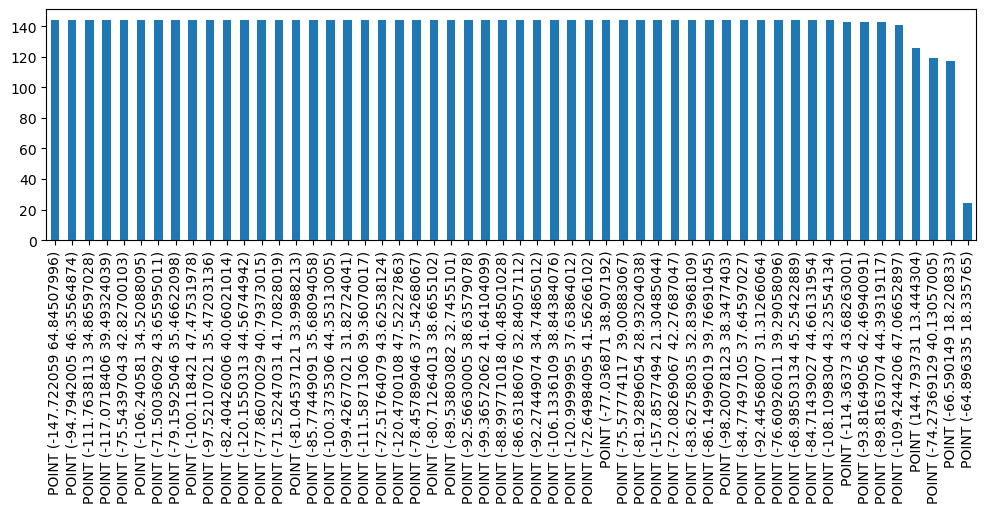

In [36]:
#(9)Geolocation
attri = 'Geolocation'
nom_attri_vis(attri)

**数值属性**  

In [37]:
#定义数值属性可视化函数
def num_attri_vis(attri):
    # coding=utf-8
    plt.figure(figsize = (10,10))
    # 直方图
    plt.subplot(2,2,1)
    title = attri + " hist"
    plt.title(title)
    data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数

    # 盒图
    plt.subplot(2,2,2)
    title = attri + " box"
    plt.title(title)
    p = data.boxplot([attri],return_type='dict')

    #q-q 图
    plt.subplot(2,2,3)
    stats.probplot(data[attri],dist="norm",plot=plt)

    plt.show()
    
    # 检查离群点
    print("离群点如下：\n",p['fliers'][0].get_ydata())

分别对上述7个数值属性绘制直方图、盒图和q-q图，并检查离群点  
YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit ,High_Confidence_Limit,LocationID

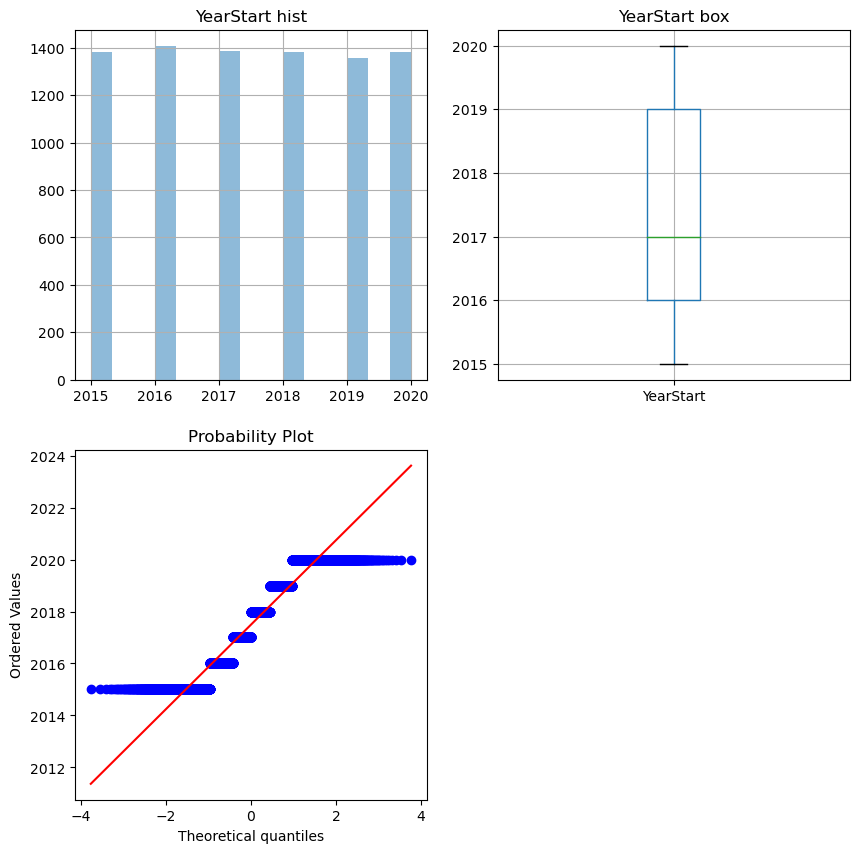

离群点如下：
 []


In [38]:
#(1)YearStart
attri = 'YearStart'
num_attri_vis(attri)

该属性大致符合均匀分布

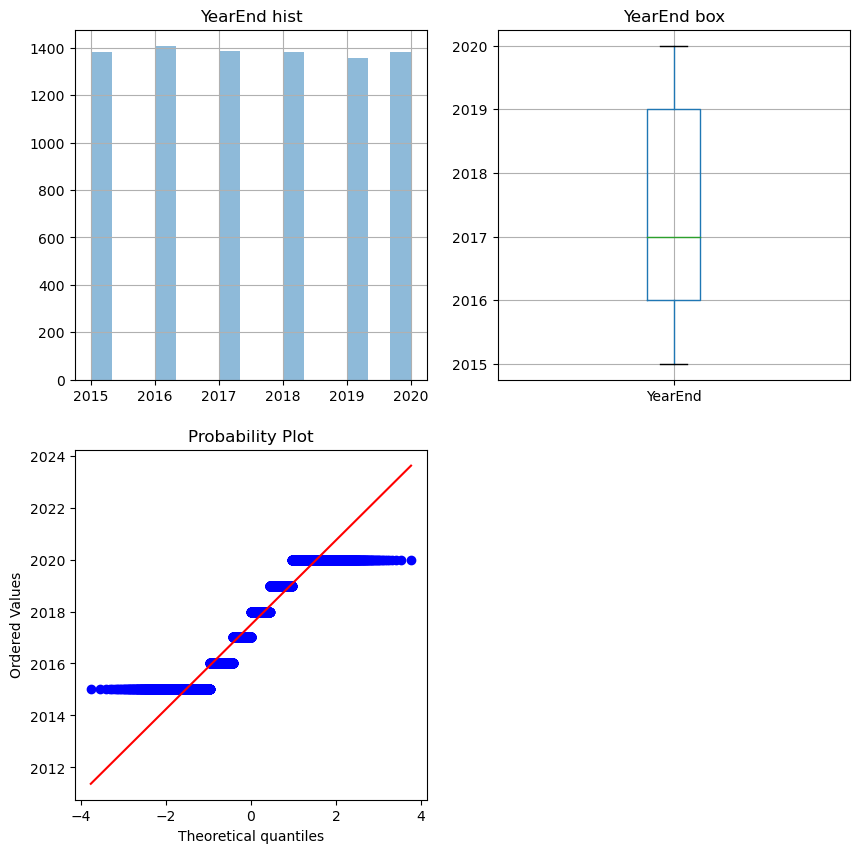

离群点如下：
 []


In [39]:
#(2)YearEnd
attri = 'YearEnd'
num_attri_vis(attri)

该属性大致符合均匀分布

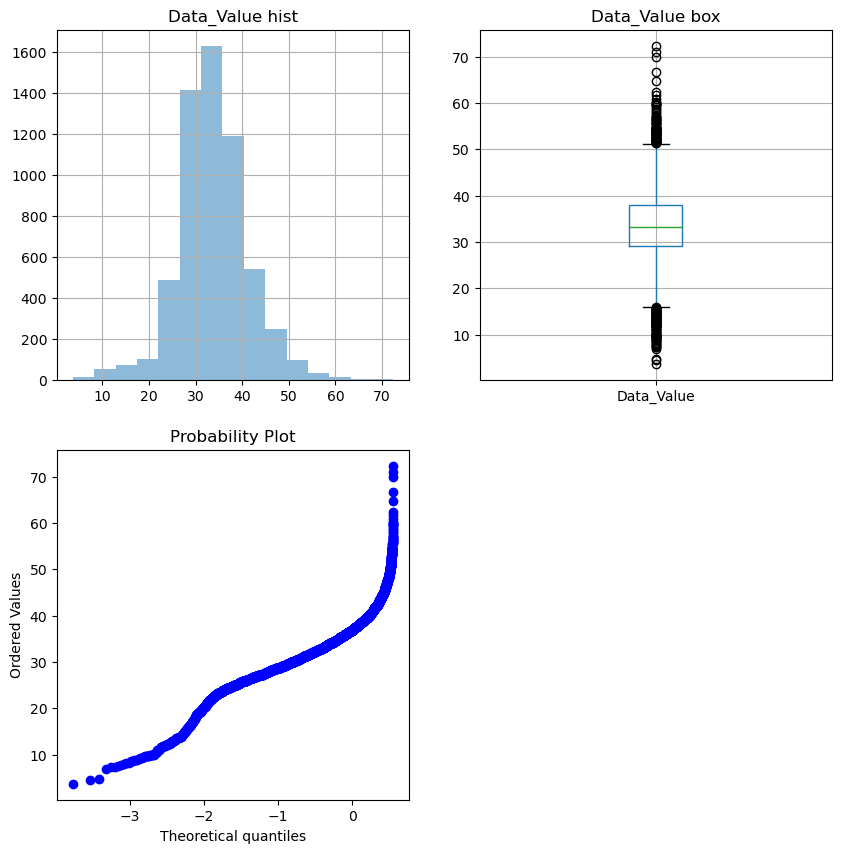

离群点如下：
 [14.6 11.9 13.3 7.8 12.2 15.8 9.8 10.0 13.5 13.1 12.7 15.8 11.8 14.8 15.4
 13.6 12.4 11.9 14.5 11.8 14.7 11.0 12.9 12.9 12.6 13.9 15.2 13.1 15.6
 13.9 15.7 14.8 12.3 15.1 12.9 9.9 15.7 13.9 10.0 13.4 13.6 9.8 4.8 9.0
 9.2 8.9 15.6 12.6 10.6 10.0 13.0 10.2 14.0 9.4 11.6 13.7 9.8 8.9 8.0 11.8
 14.4 9.3 14.5 6.8 3.7 8.1 13.2 7.6 13.9 12.8 13.5 8.7 13.5 11.3 9.9 12.9
 15.1 12.2 12.1 8.1 12.3 7.4 13.5 13.7 11.6 11.9 14.8 13.0 15.5 11.1 9.8
 12.1 11.7 13.7 9.7 15.1 4.6 13.8 10.3 7.4 8.7 15.9 14.2 9.4 8.9 10.3 12.1
 12.2 14.2 14.5 11.1 10.9 13.5 54.6 56.1 54.3 53.9 51.8 55.5 69.9 52.4
 57.9 53.3 53.8 53.0 54.3 54.5 58.8 53.5 57.0 60.3 51.9 59.5 51.4 51.6
 54.4 54.0 56.4 51.5 59.5 64.8 52.5 53.3 53.2 55.6 51.9 52.2 51.8 57.3
 51.8 60.8 54.5 53.3 53.6 59.8 52.9 53.5 52.5 59.1 54.3 54.0 51.3 58.5
 62.4 59.9 58.1 54.2 52.2 61.8 52.4 56.6 53.4 54.5 52.6 54.8 54.6 54.1
 51.8 55.5 54.8 53.0 54.8 53.4 52.4 53.0 56.0 56.6 52.3 56.3 54.6 54.3
 53.7 60.1 52.4 55.8 54.0 54.6 56.8 71.1 51.7 72.4 5

In [40]:
#(3)Data_Value
attri = 'Data_Value'
num_attri_vis(attri)

该属性大致符合单峰分布

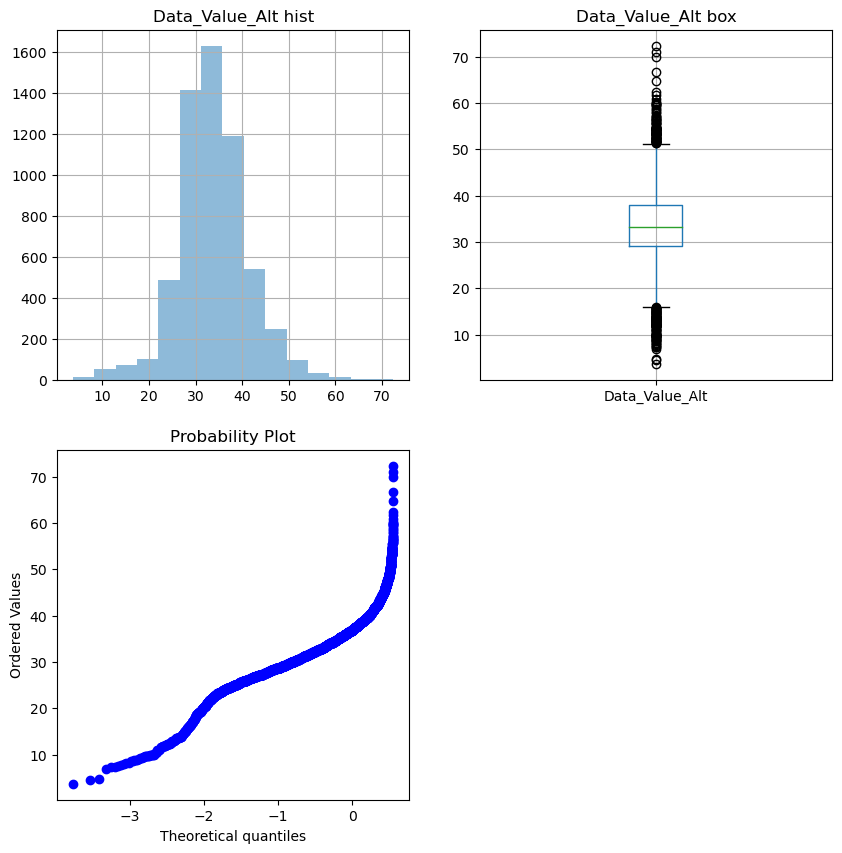

离群点如下：
 [14.6 11.9 13.3 7.8 12.2 15.8 9.8 10.0 13.5 13.1 12.7 15.8 11.8 14.8 15.4
 13.6 12.4 11.9 14.5 11.8 14.7 11.0 12.9 12.9 12.6 13.9 15.2 13.1 15.6
 13.9 15.7 14.8 12.3 15.1 12.9 9.9 15.7 13.9 10.0 13.4 13.6 9.8 4.8 9.0
 9.2 8.9 15.6 12.6 10.6 10.0 13.0 10.2 14.0 9.4 11.6 13.7 9.8 8.9 8.0 11.8
 14.4 9.3 14.5 6.8 3.7 8.1 13.2 7.6 13.9 12.8 13.5 8.7 13.5 11.3 9.9 12.9
 15.1 12.2 12.1 8.1 12.3 7.4 13.5 13.7 11.6 11.9 14.8 13.0 15.5 11.1 9.8
 12.1 11.7 13.7 9.7 15.1 4.6 13.8 10.3 7.4 8.7 15.9 14.2 9.4 8.9 10.3 12.1
 12.2 14.2 14.5 11.1 10.9 13.5 54.6 56.1 54.3 53.9 51.8 55.5 69.9 52.4
 57.9 53.3 53.8 53.0 54.3 54.5 58.8 53.5 57.0 60.3 51.9 59.5 51.4 51.6
 54.4 54.0 56.4 51.5 59.5 64.8 52.5 53.3 53.2 55.6 51.9 52.2 51.8 57.3
 51.8 60.8 54.5 53.3 53.6 59.8 52.9 53.5 52.5 59.1 54.3 54.0 51.3 58.5
 62.4 59.9 58.1 54.2 52.2 61.8 52.4 56.6 53.4 54.5 52.6 54.8 54.6 54.1
 51.8 55.5 54.8 53.0 54.8 53.4 52.4 53.0 56.0 56.6 52.3 56.3 54.6 54.3
 53.7 60.1 52.4 55.8 54.0 54.6 56.8 71.1 51.7 72.4 5

In [41]:
#(4)Data_Value_Alt
attri = 'Data_Value_Alt'
num_attri_vis(attri)

该属性大致符合单峰分布

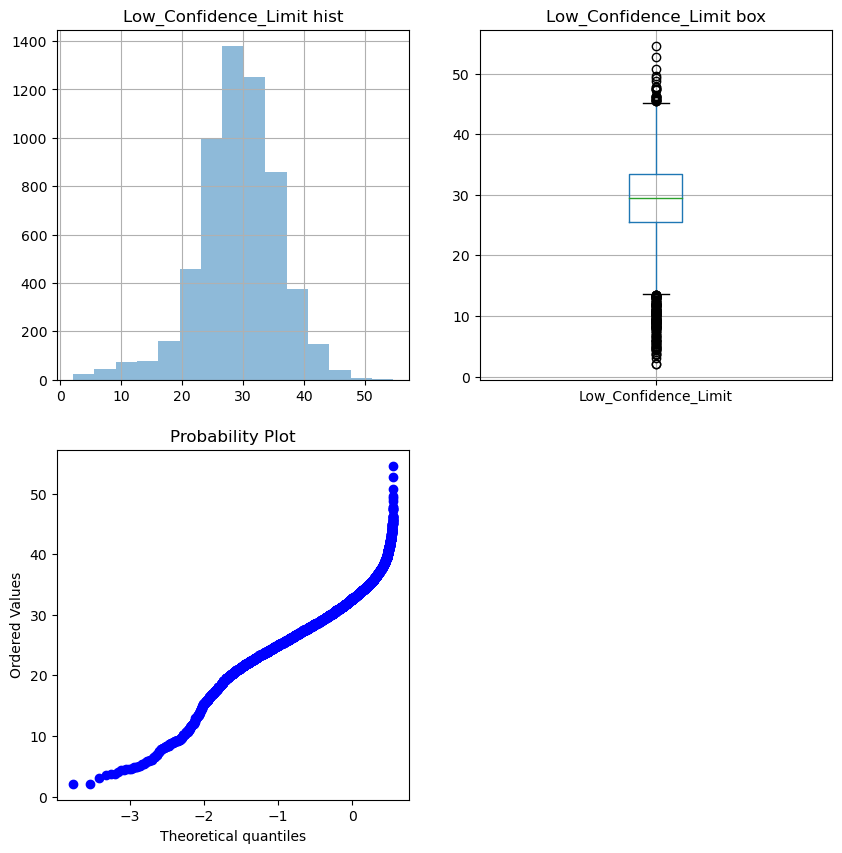

离群点如下：
 [12.0 9.1 7.9 9.1 4.4 8.3 10.1 12.3 5.8 5.7 10.1 9.5 11.7 9.2 13.4 8.6
 11.9 11.9 10.7 10.6 9.2 10.6 12.4 9.5 13.3 11.8 11.6 11.8 9.4 11.8 8.0
 13.5 10.0 13.1 12.9 11.0 11.7 10.2 13.5 12.6 13.1 12.3 9.8 11.4 13.2 12.7
 10.3 13.5 9.0 13.3 10.9 12.1 11.8 7.3 10.1 12.9 10.7 9.4 8.8 8.2 10.3
 10.4 5.5 8.4 8.4 4.9 8.8 11.2 13.3 9.4 3.7 2.1 13.0 5.4 3.6 4.8 13.1 12.9
 11.9 9.2 6.9 10.9 9.4 13.0 6.3 6.8 8.3 6.5 8.2 6.1 8.0 13.4 9.1 4.5 5.9
 4.9 7.5 9.1 5.4 8.6 3.7 2.1 4.6 9.3 5.0 9.1 8.4 8.8 9.5 4.6 9.0 8.0 6.1
 10.6 9.7 12.0 7.8 9.8 4.7 8.4 5.3 11.2 10.1 8.9 9.6 11.7 10.7 11.0 8.2
 6.6 9.7 9.1 10.4 10.6 11.0 11.3 6.1 12.9 9.4 3.0 11.0 8.7 6.8 10.3 4.3
 5.1 11.5 12.0 10.7 6.5 12.3 4.1 5.8 8.9 8.0 8.8 8.8 7.8 7.2 7.5 45.4 45.6
 49.6 46.2 54.6 47.7 46.1 45.7 47.2 45.9 49.2 47.4 47.7 45.5 47.4 46.3
 50.8 47.4 46.3 45.8 45.4 48.7 46.3 45.9 45.7 52.7]


In [42]:
#(5)Low_Confidence_Limit
attri = 'Low_Confidence_Limit'
num_attri_vis(attri)

该属性大致符合单峰分布

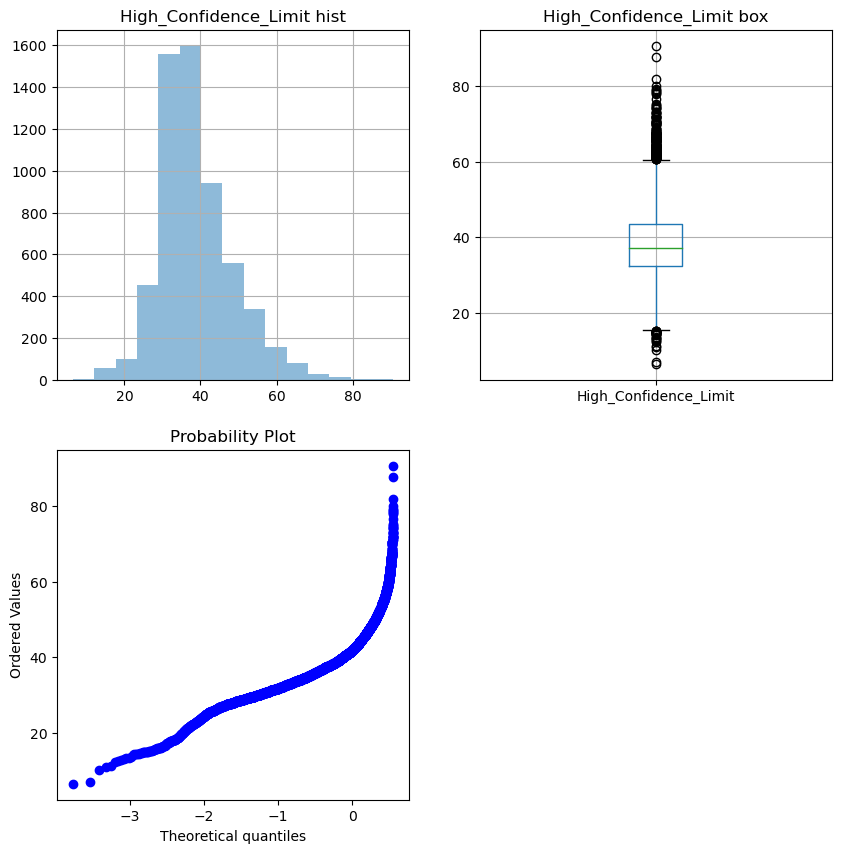

离群点如下：
 [13.3 14.8 14.8 15.0 11.0 14.7 14.5 14.3 13.1 12.7 12.3 6.5 14.1 11.2 15.0
 13.6 10.2 15.1 14.6 14.8 14.4 15.1 14.9 15.3 7.0 15.2 12.5 14.3 13.3 64.2
 65.6 62.4 65.5 63.7 63.8 61.8 64.5 62.6 67.6 62.9 81.8 61.7 67.4 61.3
 62.6 66.7 62.9 68.6 67.3 65.5 74.3 74.6 70.4 67.7 61.6 69.9 65.4 70.6
 60.9 64.6 61.0 60.9 73.0 72.0 65.9 66.8 68.6 63.4 68.2 67.3 61.3 62.4
 66.5 62.6 63.5 66.8 71.8 61.6 60.6 63.0 65.6 61.1 65.6 66.6 60.9 77.8
 61.8 64.6 62.1 61.5 61.9 66.3 66.2 65.3 61.7 61.1 61.8 63.1 66.4 61.2
 67.0 71.2 62.8 79.3 71.7 63.2 64.0 65.8 64.7 65.4 65.4 63.4 75.2 61.1
 76.5 67.9 64.5 68.2 61.7 66.0 71.8 66.5 62.9 61.8 63.6 71.9 65.4 73.2
 78.7 64.2 78.2 60.9 64.2 73.1 71.9 70.0 60.9 80.0 64.6 69.8 62.7 60.6
 67.6 62.5 65.9 63.7 62.4 64.3 60.7 60.7 61.1 66.1 60.6 63.3 66.7 65.6
 63.9 65.5 61.4 68.0 61.8 64.4 74.0 62.0 75.0 65.7 65.3 62.6 70.1 61.3
 66.3 74.2 71.0 62.5 67.7 68.0 78.9 63.5 67.6 66.2 62.1 67.3 64.1 68.6
 70.4 62.3 68.9 61.3 63.9 73.0 69.6 64.9 67.1 72.7 87.8 70.4 

In [43]:
#(6)High_Confidence_Limit
attri = 'High_Confidence_Limit'
num_attri_vis(attri)

该属性大致符合单峰分布

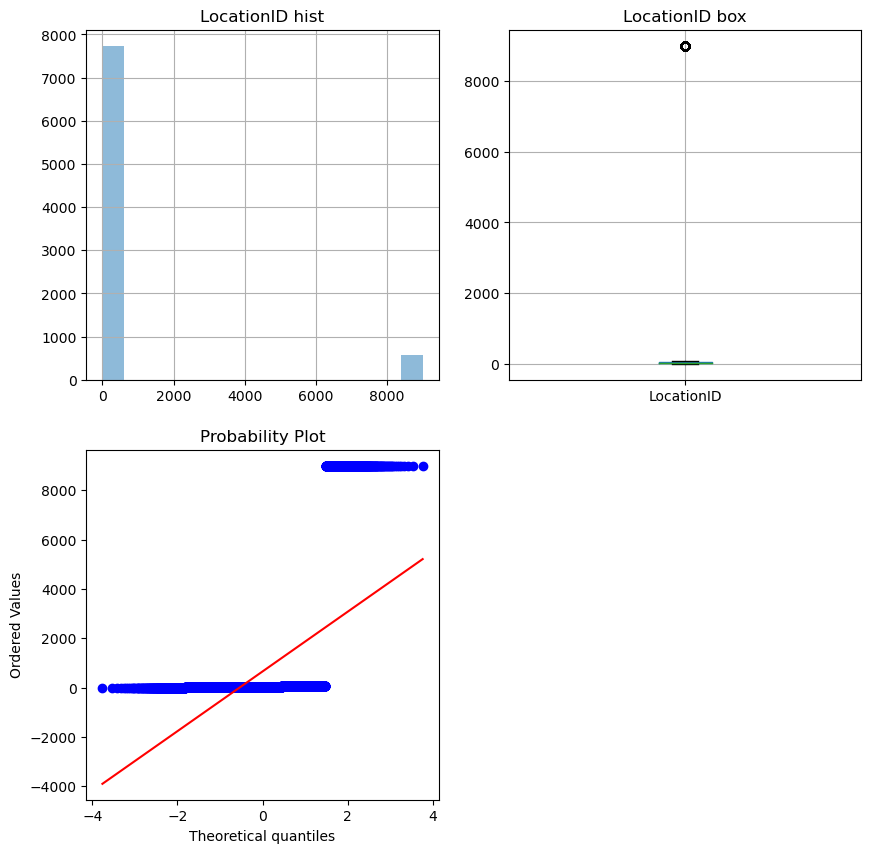

离群点如下：
 [9001 9001 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002 9002
 9002 9002 9002 9002 9002 9002 9001 9001 9001 9001 9001 9001 9001 9001
 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001
 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001
 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 9001 900

In [44]:
#(7)LocationID
attri = 'LocationID'
num_attri_vis(attri)

该属性没有分布

#### 2.2数据缺失的处理

**观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:**  
  ·将缺失部分剔除  
  ·用最高频率值来填补缺失值  
  ·通过属性的相关关系来填补缺失值  
  ·通过数据对象之间的相似性来填补缺失值  
注意：在处理后完成，要对比新旧数据集的差异。  

In [45]:
#检查数据缺失情况
data.isnull().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Data_Value_Unit                 0
DataValueTypeID                 0
Data_Value_Type                 0
Data_Value                   2411
Data_Value_Alt               2411
Low_Confidence_Limit         2411
High_Confidence_Limit        2411
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1044
Stratification2              1044
Geolocation                   720
LocationID                      0
StratificationCategoryID1       0
StratificationID1               0
StratificationCategoryID2       0
StratificationID2               0
dtype: int64

**由输出可知，该数据集中以下属性存在缺失数据：**  
·Data_Value  实际数据值  
·Data_Value_Alt  一个替代数据值  
·Low_Confidence_Limit  数据值置信区间的下限  
·High_Confidence_Limit  数据值置信区间的上限  
·StratificationCategory2  用于分层的第二类  
·Stratification2  用于第二类的具体分层  
·Geolocation  收集数据的位置的经纬度  
缺失原因可能是由于未完全记录、遗漏或无法获取

**注意到 Data_Value, Data_Value_Alt, Low_Confidence_Limit 和 High_Confidence_Limit 四个属性缺失值数量相同**  
**StratificationCategory2 与 Stratification2 属性缺失值数量相同**  
**接下来检查是否在相同数据元组内缺失**  

In [46]:
#(1)检查Data_Value, Data_Value_Alt, Low_Confidence_Limit， High_Confidence_Limit 是否同时缺失
flag = True
for index, row in data.iterrows():
    #全空
    if np.isnan(row['Data_Value']) and np.isnan(row['Data_Value_Alt']) and np.isnan(row['Low_Confidence_Limit']) and np.isnan(row['High_Confidence_Limit']):
        continue
    #全不空
    elif (not np.isnan(row['Data_Value'])) and (not np.isnan(row['Data_Value_Alt'])) and (not np.isnan(row['Low_Confidence_Limit'])) and (not np.isnan(row['High_Confidence_Limit'])):  
        continue
    else: 
        flag = False
        break
flag

True

In [47]:
#(1)检查 StratificationCategory2, Stratification2 是否同时缺失
flag = True
for index, row in data.iterrows():
    #全空
    if row['StratificationCategory2'] == "" and row['Stratification2'] == "":
        continue
    #全不空
    elif row['StratificationCategory2'] != "" and row['Stratification2'] != "":  
        continue
    else: 
        flag = False
        break
#     print(row['StratificationCategory2'])
#     print(row['Stratification2'])
flag

True

**由上述结果可知：**  
**Data_Value, Data_Value_Alt, Low_Confidence_Limit， High_Confidence_Limit 同时缺失**  
**StratificationCategory2, Stratification2 同时缺失**  

In [48]:
 # 查看属性的相关关系
data.corr()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
YearStart,1.0000,1.0000,0.1238,0.1238,0.1148,0.1098,0.0013
YearEnd,1.0000,1.0000,0.1238,0.1238,0.1148,0.1098,0.0013
Data_Value,0.1238,0.1238,1.0000,1.0000,0.8725,0.9187,-0.0759
Data_Value_Alt,0.1238,0.1238,1.0000,1.0000,0.8725,0.9187,-0.0759
Low_Confidence_Limit,0.1148,0.1148,0.8725,0.8725,1.0000,0.6108,-0.0278
High_Confidence_Limit,0.1098,0.1098,0.9187,0.9187,0.6108,1.0000,-0.0958
LocationID,0.0013,0.0013,-0.0759,-0.0759,-0.0278,-0.0958,1.0000


**注意到 YearStart 与 YearEnd , Data_Value 与 Data_Value_Alt 相关系数为1，检查是否每个值都相同**  

In [49]:
#检查 YearStart 与 YearEnd 是否每个值都相同
flag = True
for index, row in data.iterrows():
    #相同
    if row['YearStart'] == row['YearEnd'] :
        continue
    else: 
        flag = False
        break
#     print(row['StratificationCategory2'])
#     print(row['Stratification2'])
flag

True

In [50]:
#检查 Data_Value 与 Data_Value_Alt 是否每个值都相同
flag = True
for index, row in data.iterrows():
    #相同
    if row['Data_Value'] == row['Data_Value_Alt'] :
        continue
    elif np.isnan(row['Data_Value']) and np.isnan(row['Data_Value_Alt']):
        continue
    else: 
        print(row['Data_Value'])
        print(row['Data_Value_Alt'])
        flag = False
        break
#     print(row['StratificationCategory2'])
#     print(row['Stratification2'])
flag

True

**由上述结果可知，两组属性每组两个值都相同。因此，只需要对其同时处理即可。**  

##### 方案一 将缺失部分剔除

**缺失数据中 Data_Value, Data_Value_Alt, Low_Confidence_Limit， High_Confidence_Limit与其他属性没有直接关联，且同时缺失。**
**因此，可以尝试直接剔除方法**  
**其他属性有明显的关联关系，这里不采用直接剔除方法**  

In [51]:
new_data = data.copy(deep=True)
new_data = new_data.dropna(subset=['Data_Value'])
new_data.isnull().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Data_Value_Unit                 0
DataValueTypeID                 0
Data_Value_Type                 0
Data_Value                      0
Data_Value_Alt                  0
Low_Confidence_Limit            0
High_Confidence_Limit           0
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1044
Stratification2              1044
Geolocation                   709
LocationID                      0
StratificationCategoryID1       0
StratificationID1               0
StratificationCategoryID2       0
StratificationID2               0
dtype: int64

查看新数据集数据摘要

In [52]:
#(1)LocationAbbr，LocationDesc
new_data["LocationDesc"].value_counts()

West                               144
United States, DC & Territories    144
Midwest                            142
South                              141
Northeast                          138
Washington                         120
Arizona                            119
Oklahoma                           118
New York                           118
California                         117
Kansas                             116
Nebraska                           115
Florida                            114
Texas                              111
Connecticut                        109
New Mexico                         108
Hawaii                             108
North Carolina                     108
Minnesota                          108
Maryland                           108
Colorado                           107
Massachusetts                      106
Illinois                           105
Virginia                           104
Indiana                            103
Michigan                 

In [53]:
#(2)Stratification1,  StratificationID1
new_data["Stratification1"].value_counts()

Overall              2089
50-64 years          1965
65 years or older    1835
Name: Stratification1, dtype: int64

In [54]:
#(3)StratificationCategory2,  StratificationCategoryID2
new_data["StratificationCategory2"].value_counts()

Race/Ethnicity    2759
Gender            2086
Name: StratificationCategory2, dtype: int64

In [55]:
#(4)Stratification2,  StratificationID2
new_data["Stratification2"].value_counts()

Male                        1043
Female                      1043
White, non-Hispanic         1017
Black, non-Hispanic          712
Hispanic                     595
Native Am/Alaskan Native     295
Asian/Pacific Islander       140
Name: Stratification2, dtype: int64

In [56]:
#(5)Geolocation
new_data["Geolocation"].value_counts()

POINT (-120.4700108 47.52227863)    120
POINT (-111.7638113 34.86597028)    119
POINT (-97.52107021 35.47203136)    118
POINT (-75.54397043 42.82700103)    118
POINT (-120.9999995 37.63864012)    117
POINT (-98.20078123 38.3477403)     116
POINT (-99.36572062 41.64104099)    115
POINT (-81.92896054 28.93204038)    114
POINT (-99.42677021 31.82724041)    111
POINT (-72.64984095 41.56266102)    109
POINT (-76.60926011 39.29058096)    108
POINT (-79.15925046 35.46622098)    108
POINT (-94.7942005 46.35564874)     108
POINT (-106.240581 34.52088095)     108
POINT (-157.8577494 21.30485044)    108
POINT (-106.1336109 38.84384076)    107
POINT (-72.08269067 42.27687047)    106
POINT (-88.99771018 40.48501028)    105
POINT (-78.45789046 37.54268067)    104
POINT (-86.14996019 39.76691045)    103
POINT (-84.71439027 44.66131954)    102
POINT (-83.62758035 32.83968109)    101
POINT (-75.57774117 39.00883067)    101
POINT (-82.40426006 40.06021014)     98
POINT (-77.86070029 40.79373015)     97


**由于先前处理时五数概况及可视化默认剔除缺失值，这里只比较标称属性频数变化**  
**对比新旧频数，可以看出缺失数据的分布较为平均，此时可以采用直接剔除缺失值的方法**  

##### 方案二 用最高频率值来填补缺失值

含缺失值属性如下：
·Data_Value  实际数据值  
·Data_Value_Alt  一个替代数据值  
·Low_Confidence_Limit  数据值置信区间的下限  
·High_Confidence_Limit  数据值置信区间的上限  
·StratificationCategory2  用于分层的第二类  
·Stratification2  用于第二类的具体分层  
·Geolocation  收集数据的位置的经纬度  

**缺失数据中 Data_Value, Data_Value_Alt, Low_Confidence_Limit， High_Confidence_Limit与其他属性没有直接关联，且同时缺失。**
**因此，可以尝试用最高频率值来填补缺失值**  
**其他属性有明显的关联关系，这里不采用最高频率值来填补缺失值**  

In [57]:
# 用最高频率来填补name,commit_count缺失值
attri = ['Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit']
new_data = data.copy(deep=True)

for i in range(0,4):
    word_counts = Counter(new_data[attri[i]])
    top = word_counts.most_common()[0][0]
    if top != top:
        top = word_counts.most_common()[1][0]
    print("The most frequency value is:",top)
    new_data[attri[i]] = new_data[attri[i]].fillna(top)

new_data.isnull().sum()

The most frequency value is: 32.2
The most frequency value is: 32.2
The most frequency value is: 30.8
The most frequency value is: 31.9


YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Data_Value_Unit                 0
DataValueTypeID                 0
Data_Value_Type                 0
Data_Value                      0
Data_Value_Alt                  0
Low_Confidence_Limit            0
High_Confidence_Limit           0
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1044
Stratification2              1044
Geolocation                   720
LocationID                      0
StratificationCategoryID1       0
StratificationID1               0
StratificationCategoryID2       0
StratificationID2               0
dtype: int64

**处理前后标称属性未发生变化，这里展示新旧数据集五数变化**  

In [58]:
# 原数据集五数
digital_data = ['Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit']
data[digital_data].describe()

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
count,5889.0000,5889.0000,5889.0000,5889.0000
mean,33.7121,33.7121,29.1389,38.6961
std,7.4038,7.4038,6.5922,9.6166
min,3.7000,3.7000,2.1000,6.5000
25%,29.2000,29.2000,25.5000,32.3000
50%,33.3000,33.3000,29.4000,37.2000
75%,38.0000,38.0000,33.4000,43.6000
max,72.4000,72.4000,54.6000,90.7000


In [59]:
#新数据集五数
new_data[digital_data].describe()

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
count,8300.0000,8300.0000,8300.0000,8300.0000
mean,33.2729,33.2729,29.6214,36.7219
std,6.2739,6.2739,5.6037,8.6679
min,3.7000,3.7000,2.1000,6.5000
25%,30.9000,30.9000,27.2000,31.9000
50%,32.2000,32.2000,30.8000,33.3000
75%,35.9000,35.9000,31.6000,40.4000
max,72.4000,72.4000,54.6000,90.7000


**结合以上两表，可以看出用最高频率值替换后，平均值变化较小，五数变化幅度也不大。**  
**接下来比较处理前后数据集相关属性的直方图变化**

In [60]:
# 定义直方图比较函数
def hist_cmp(attri):
    # coding=utf-8
    plt.figure(figsize = (16,8))
    
    #原数据
    plt.subplot(1,2,1)
    title = attri + " hist"
    plt.title(title)
    data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数
    
    #新数据
    plt.subplot(1,2,2)
    title = "new" + attri + " hist"
    plt.title(title)
    new_data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数
    
    plt.show()

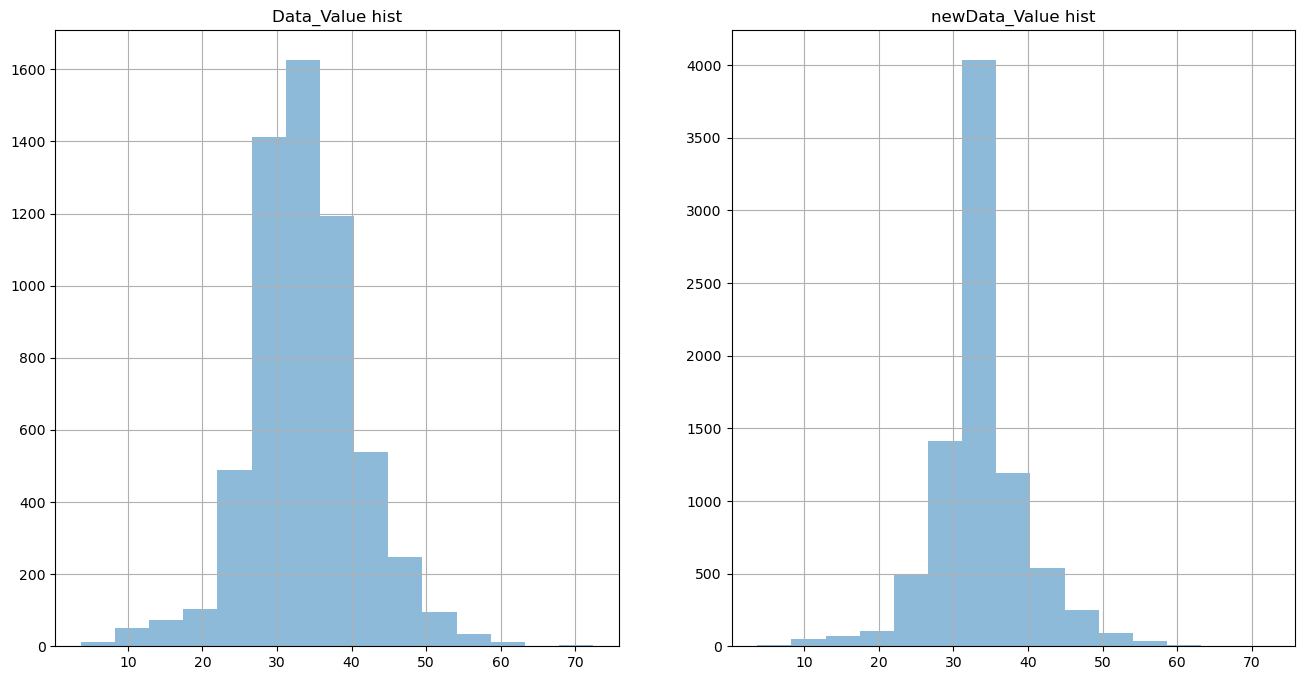

In [61]:
#(1)Data_Value
hist_cmp("Data_Value")

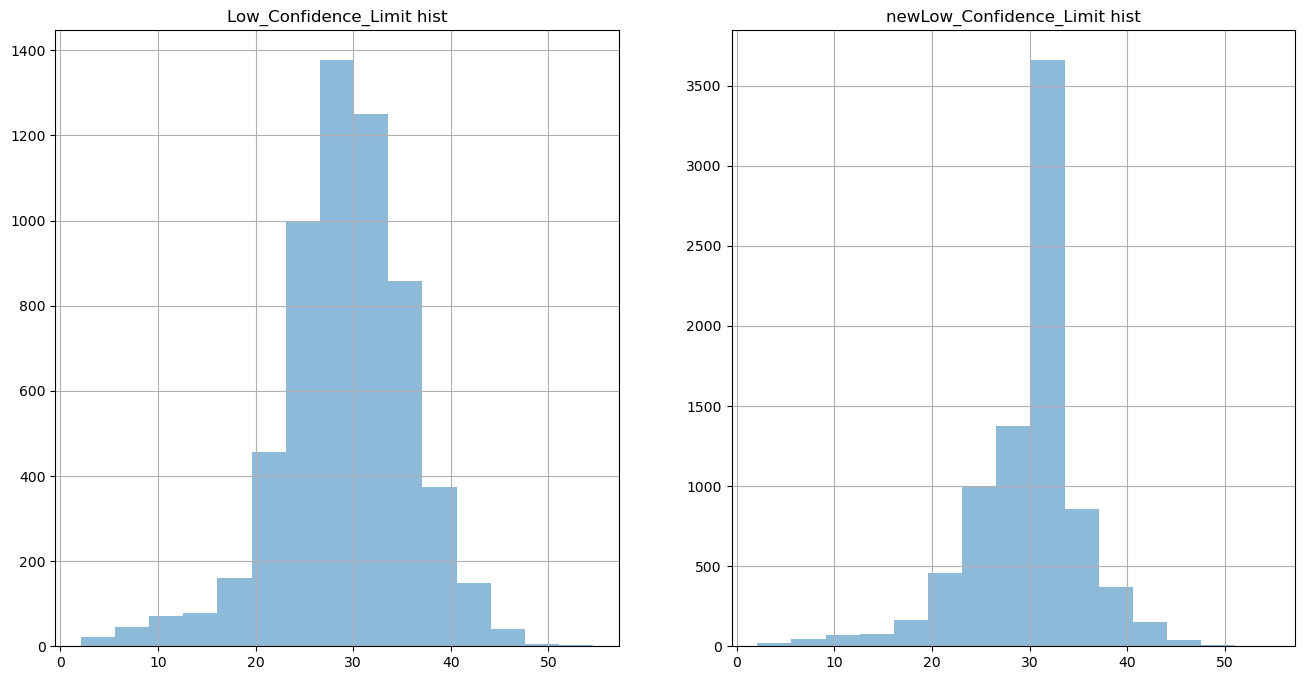

In [62]:
#(2)Low_Confidence_Limit
hist_cmp("Low_Confidence_Limit")

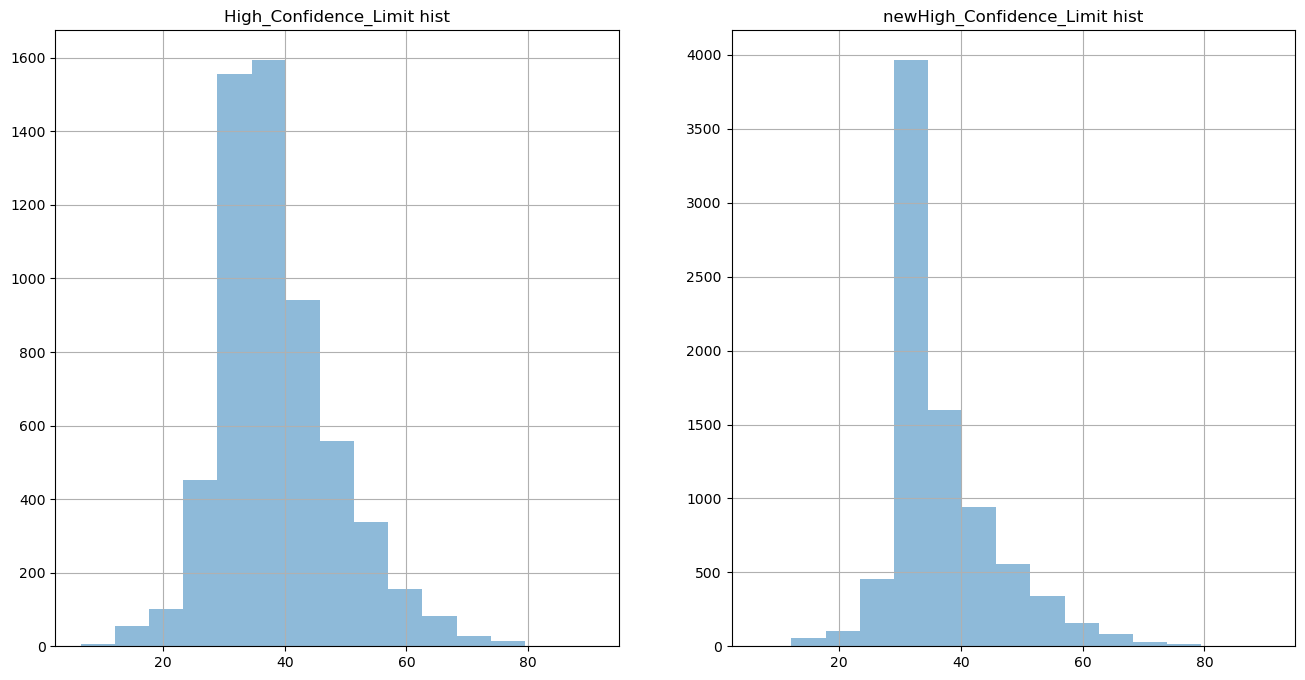

In [63]:
#(3)High_Confidence_Limit
hist_cmp("High_Confidence_Limit")

**从三组对比可以看出，处理前后数据均为单峰分布，未发生太大改变。只是处理后峰值更高**

##### 方案三 通过属性的相关关系来填补缺失值

**由数据集属性可知：StratificationCategory2 与 StratificationCategoryID2, Stratification2 与 StratificationID2, Geolocation 与 LocationID 之间存在着属性间的相关关系。**  
**因此，可以尝试通过属性的相关关系来填补缺失值**  

In [64]:
#寻找属性之间的对应关系
miss_attri = ['StratificationCategory2', 'Stratification2', 'Geolocation']
cor_attri = ['StratificationCategoryID2', 'StratificationID2', 'LocationID']
new_data = data.copy(deep=True)

for i in range(0,3):
    table = data.copy(deep=True)
    data.shape
    table = pd.DataFrame(new_data,columns=[miss_attri[i], cor_attri[i]])
    table.drop_duplicates(inplace=True)
    table.reset_index(inplace=True,drop=True)
    print(table)
#     for j in range(0,)
    

# new_data.isnull().sum()

  StratificationCategory2 StratificationCategoryID2
0          Race/Ethnicity                      RACE
1                  Gender                    GENDER
2                     NaN                   OVERALL
            Stratification2 StratificationID2
0                  Hispanic               HIS
1  Native Am/Alaskan Native               NAA
2                      Male              MALE
3       White, non-Hispanic               WHT
4                       NaN           OVERALL
5    Asian/Pacific Islander               ASN
6       Black, non-Hispanic               BLK
7                    Female            FEMALE
                         Geolocation  LocationID
0    POINT (-147.722059 64.84507996)           2
1   POINT (-111.7638113 34.86597028)           4
2   POINT (-86.63186076 32.84057112)           1
3   POINT (-92.27449074 34.74865012)           5
4   POINT (-106.1336109 38.84384076)           8
5   POINT (-120.9999995 37.63864012)           6
6   POINT (-72.64984095 41.56266102

**由以上结果可知，存在一些故意设置为空的选项，可能是无法获取或出于隐私考虑。**  
**暂不对其进行处理**

##### 方案四 通过数据对象之间的相似性来填补缺失值

In [65]:
 # 查看数值数据之间的相似性
data.corr()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
YearStart,1.0000,1.0000,0.1238,0.1238,0.1148,0.1098,0.0013
YearEnd,1.0000,1.0000,0.1238,0.1238,0.1148,0.1098,0.0013
Data_Value,0.1238,0.1238,1.0000,1.0000,0.8725,0.9187,-0.0759
Data_Value_Alt,0.1238,0.1238,1.0000,1.0000,0.8725,0.9187,-0.0759
Low_Confidence_Limit,0.1148,0.1148,0.8725,0.8725,1.0000,0.6108,-0.0278
High_Confidence_Limit,0.1098,0.1098,0.9187,0.9187,0.6108,1.0000,-0.0958
LocationID,0.0013,0.0013,-0.0759,-0.0759,-0.0278,-0.0958,1.0000


**存在缺失值的属性与其他未缺失属性相关性过低，无法通过数据对象间的相似性填补缺失值。**  